## 1. WORLD VACCINATIONS PROGRESS

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import data files

In [2]:
covid =pd.read_csv("country_vaccinations.csv")

In [3]:
covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              9073 non-null   object 
 1   iso_code                             9073 non-null   object 
 2   date                                 9073 non-null   object 
 3   total_vaccinations                   5497 non-null   float64
 4   people_vaccinated                    4923 non-null   float64
 5   people_fully_vaccinated              3375 non-null   float64
 6   daily_vaccinations_raw               4606 non-null   float64
 7   daily_vaccinations                   8895 non-null   float64
 8   total_vaccinations_per_hundred       5497 non-null   float64
 9   people_vaccinated_per_hundred        4923 non-null   float64
 10  people_fully_vaccinated_per_hundred  3375 non-null   float64
 11  daily_vaccinations_per_million

## Check the percentage of missing Data

In [5]:
round(100*(covid.isnull().sum()/len(covid.index)),2)

country                                 0.00
iso_code                                0.00
date                                    0.00
total_vaccinations                     39.41
people_vaccinated                      45.74
people_fully_vaccinated                62.80
daily_vaccinations_raw                 49.23
daily_vaccinations                      1.96
total_vaccinations_per_hundred         39.41
people_vaccinated_per_hundred          45.74
people_fully_vaccinated_per_hundred    62.80
daily_vaccinations_per_million          1.96
vaccines                                0.00
source_name                             0.00
source_website                          0.00
dtype: float64

## Replacing all NAN values with 0

In [6]:
covid.loc[np.isnan(covid['total_vaccinations']),['total_vaccinations']] = 0
covid.loc[np.isnan(covid['people_vaccinated']),['people_vaccinated']] = 0
covid.loc[np.isnan(covid['people_fully_vaccinated']),['people_fully_vaccinated']] = 0
covid.loc[np.isnan(covid['daily_vaccinations_raw']),['daily_vaccinations_raw']] = 0
covid.loc[np.isnan(covid['daily_vaccinations']),['daily_vaccinations']] = 0
covid.loc[np.isnan(covid['total_vaccinations_per_hundred']),['total_vaccinations_per_hundred']] = 0
covid.loc[np.isnan(covid['people_vaccinated_per_hundred']),['people_vaccinated_per_hundred']] = 0
covid.loc[np.isnan(covid['people_fully_vaccinated_per_hundred']),['people_fully_vaccinated_per_hundred']] = 0
covid.loc[np.isnan(covid['daily_vaccinations_per_million']),['daily_vaccinations_per_million']] = 0

## Calculating the sum of all columns for each country

In [7]:
covid.groupby([covid.country]).sum().sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
United States,5.125701e+09,3.515084e+09,1.596192e+09,135033487.0,139492987.0,1532.61,1051.09,477.24,417092.0
India,1.366974e+09,1.169266e+09,1.977084e+08,62590036.0,59291963.0,99.06,84.70,14.32,42962.0
United Kingdom,1.366270e+09,1.283650e+09,8.262047e+07,31840987.0,33111146.0,2012.62,1890.84,121.67,487747.0
China,1.223607e+09,0.000000e+00,0.000000e+00,34230000.0,100399314.0,85.03,0.00,0.00,69745.0
England,1.156079e+09,1.091964e+09,6.411506e+07,26699876.0,27872615.0,2053.89,1939.99,113.93,495187.0
...,...,...,...,...,...,...,...,...,...
Cape Verde,2.184000e+03,2.184000e+03,0.000000e+00,0.0,2184.0,0.39,0.39,0.00,3930.0
Trinidad and Tobago,1.431000e+03,1.431000e+03,0.000000e+00,0.0,857.0,0.10,0.10,0.00,611.0
Egypt,1.315000e+03,0.000000e+00,0.000000e+00,0.0,1314.0,0.00,0.00,0.00,12.0


## Top 5 Countries for Daily Vaccinations

<function matplotlib.pyplot.show(close=None, block=None)>

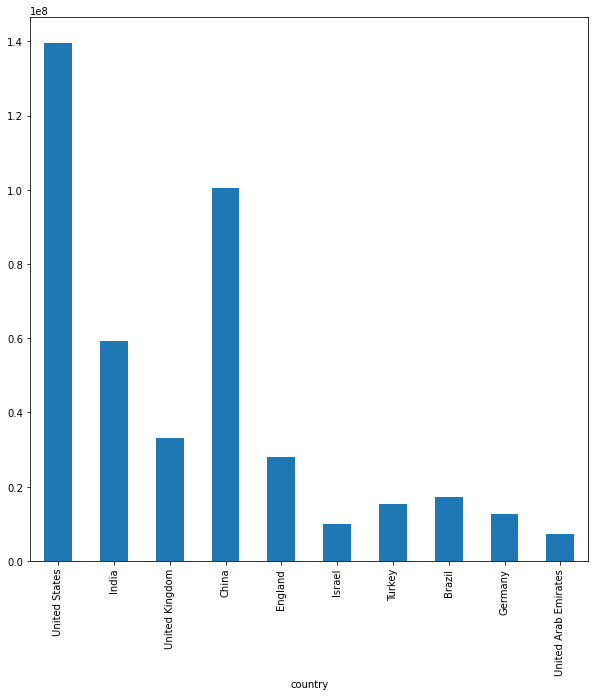

In [8]:
plt.figure(figsize=[10,10])
covid_top5 = covid.groupby([covid.country]).sum().sort_values(by='total_vaccinations',ascending=False)[0:10]
covid_top5
covid_top5['daily_vaccinations'].plot.bar()
plt.show

## Countries at the end of the Covid19 Vaccionation drive

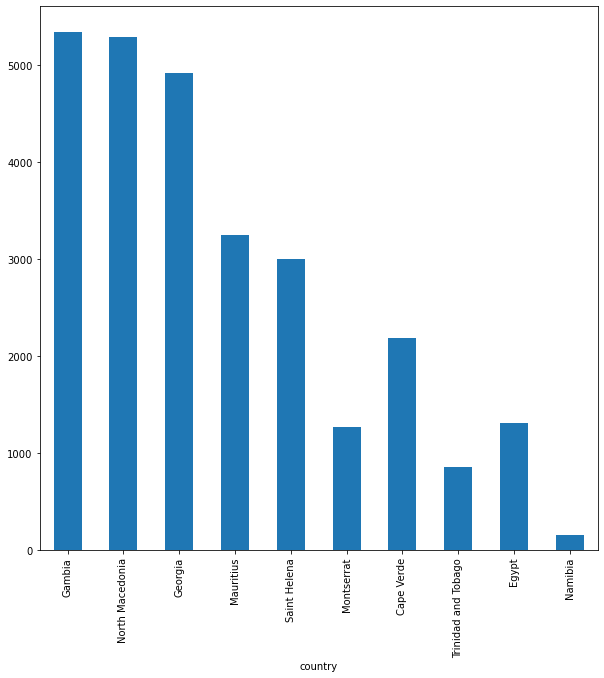

In [9]:
plt.figure(figsize=[10,10])
covid_top5 = covid.groupby([covid.country]).sum().sort_values(by='total_vaccinations',ascending=False)[-11:-1]
covid_top5
covid_top5['daily_vaccinations'].plot.bar()
plt.show()

## 2. INDIA's VACCINATION RESPONSE

## Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style

In [11]:
style.use('dark_background')

font = {'family' : 'sans-serif', 'weight' : 'bold', 'size' : 25}

plt.rc('font', **font)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams['figure.figsize'] = (15, 8)

## Import the Data set

In [12]:
covid = pd.read_csv("country_vaccinations.csv", parse_dates = ['date'])

In [13]:
covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [14]:
ind = covid[covid['country'] == 'India']

ind.isna().sum()

country                                 0
iso_code                                0
date                                    0
total_vaccinations                      1
people_vaccinated                       1
people_fully_vaccinated                30
daily_vaccinations_raw                  3
daily_vaccinations                      1
total_vaccinations_per_hundred          1
people_vaccinated_per_hundred           1
people_fully_vaccinated_per_hundred    30
daily_vaccinations_per_million          1
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

In [15]:
def GroupByCountryAndDaily(covid):
    groups = covid.groupby('country')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)
    return dailies

def GroupByDay(covid, function = np.mean):
    grouped = covid[['date', 'people_vaccinated_per_hundred', 'people_fully_vaccinated', 'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_raw']].groupby('date')
    daily = grouped.aggregate(function)
    daily['date'] = daily.index
    return daily

In [16]:
ind.loc[:, 'people_fully_vaccinated'].fillna(0.0, inplace = True)
ind.loc[:, 'people_fully_vaccinated_per_hundred'].fillna(0.0, inplace = True)
ind.loc[:, 'daily_vaccinations_raw'].fillna(0.0, inplace = True)

C:\Users\hi\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
ind.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     1
people_vaccinated                      1
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     1
total_vaccinations_per_hundred         1
people_vaccinated_per_hundred          1
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         1
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [18]:
dailies = GroupByCountryAndDaily(ind)

In [19]:
ind_covid = pd.DataFrame(dailies['India'])

In [20]:
ind_covid.dropna(0, inplace = True)
ind_covid.head()

,people_vaccinated_per_hundred,people_fully_vaccinated,people_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations_raw,date
date,,,,,,
2021-01-15,0.00,0.0,0.0,0.0,0.0,2021-01-15
2021-01-16,0.01,0.0,191181.0,0.0,191181.0,2021-01-16
2021-01-17,0.02,0.0,224301.0,0.0,33120.0,2021-01-17
2021-01-18,0.03,0.0,454049.0,0.0,229748.0,2021-01-18
2021-01-19,0.05,0.0,674835.0,0.0,220786.0,2021-01-19


In [21]:
ind_covid.iloc[:, 1:3] = ind_covid.iloc[:, 1:3] /1000
ind_covid.iloc[:,4] = ind_covid.iloc[:, 4] / 1000

In [22]:
columns = {'people_vaccinated_per_hundred': 'people vaccinated per hundred',
           'people_fully_vaccinated': 'people fully vaccinated',
           'people_vaccinated': 'people vaccinated',
           'people_fully_vaccinated_per_hundred': 'people fully vaccinated per hundred',
           'daily_vaccinations_raw': 'daily vaccinations raw'}

ind_covid.rename(columns = columns, inplace = True)
ind_covid.head()

,people vaccinated per hundred,people fully vaccinated,people vaccinated,people fully vaccinated per hundred,daily vaccinations raw,date
date,,,,,,
2021-01-15,0.00,0.0,0.000,0.0,0.000,2021-01-15
2021-01-16,0.01,0.0,191.181,0.0,191.181,2021-01-16
2021-01-17,0.02,0.0,224.301,0.0,33.120,2021-01-17
2021-01-18,0.03,0.0,454.049,0.0,229.748,2021-01-18
2021-01-19,0.05,0.0,674.835,0.0,220.786,2021-01-19


## Analysis of the number and the percentage of people vaccinated 

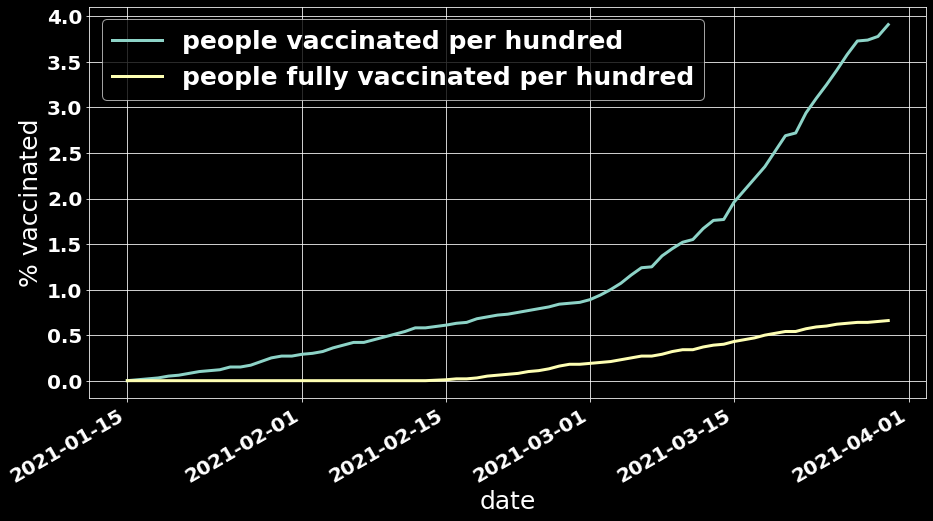

In [23]:
ind_covid[['people vaccinated per hundred', 'people fully vaccinated per hundred']].plot(ylabel = '% vaccinated', linewidth = 3)
plt.grid()

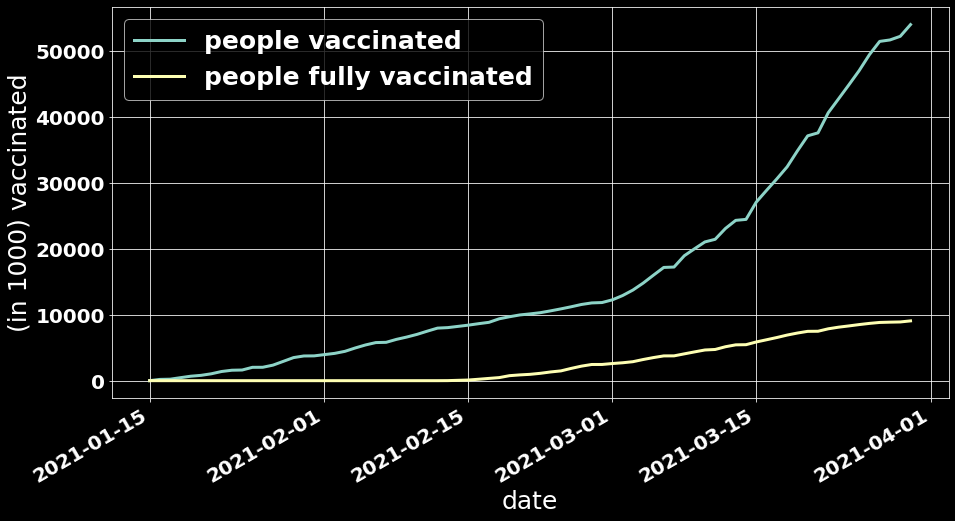

In [24]:
ind_covid[['people vaccinated', 'people fully vaccinated']].plot(ylabel = '(in 1000) vaccinated', linewidth = 3)
plt.grid()

# Analytic distribution of number of people vaccinated

In [25]:
def EvalCcovid(sample, x):
    count = 0
    for i in sample:
        if i <= x:
            count += 1
    return count / len(sample)

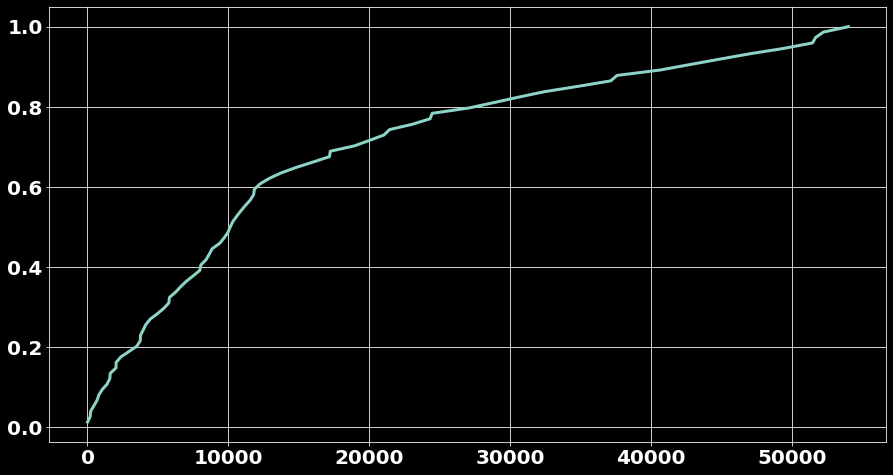

In [26]:
vaccinated = sorted(ind_covid['people vaccinated'].values)
ccovid = [EvalCcovid(vaccinated, x) for x in vaccinated]

plt.plot(vaccinated, ccovid, linewidth = 3)
plt.grid()

# Analysis of the number of people being vaccinated daily

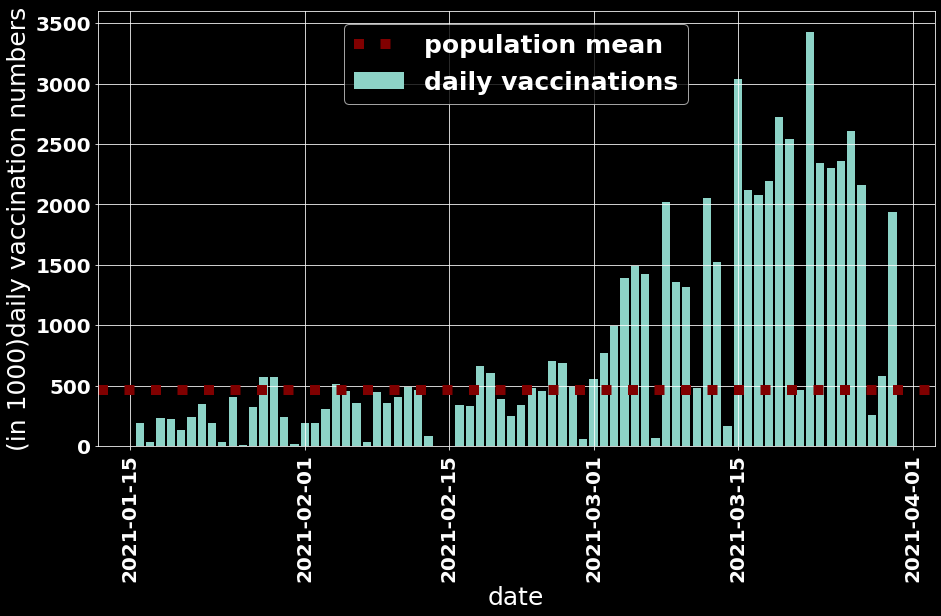

In [27]:
plt.bar(ind_covid.index[1:], ind_covid['daily vaccinations raw'][1:].values, label = 'daily vaccinations')
plt.xlabel('date')
plt.ylabel('(in 1000)daily vaccination numbers')
plt.axhline(y = np.median(ind_covid['daily vaccinations raw'].values), color = 'maroon', ls = ':', linewidth = 10, label = 'population mean')
plt.legend(loc = 9)
plt.xticks(rotation = 90)
plt.grid()